In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import seaborn as sns
import pickle

In [9]:
total_train = pd.read_csv('TOTAL_TRAIN.csv')

In [10]:
cols_geoms = [col for col in total_train if 'GEOM_' in col]

In [11]:
obs1 = total_train[cols_geoms].iloc[30]

In [12]:
puntos = [(i,v) for i, v in zip(np.arange(0.25, 1.25, 0.25), obs1.values)]

In [13]:
puntos

[(0.25, 0.477394683306647),
 (0.5, 0.0471909582175335),
 (0.75, 0.0499001996008507),
 (1.0, 1.05741017952695)]

No handles with labels found to put in legend.


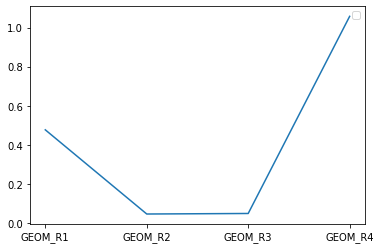

In [14]:
plt.plot(obs1)
plt.legend()

In [15]:
def PolyArea(x,y):
    return 0.5*np.abs(np.dot(x,np.roll(y,1))-np.dot(y,np.roll(x,1)))


In [16]:
PolyArea([p[0] for p in puntos], [p[1] for p in puntos])

0.3594284262538032

In [17]:
total_train['AREA'].iloc[30]

202.729289991417

In [18]:
variables_colores = [col for col in total_train.columns if 'Q_' in col]

In [19]:
total_colores = total_train[variables_colores]

In [20]:
cuartiles_verdes = total_colores[[col for col in total_colores.columns if 'Q_G_' in col]]

In [21]:
cuartiles_verdes.head()

,Q_G_3_0_0,Q_G_3_0_1,Q_G_3_0_2,Q_G_3_0_3,Q_G_3_0_4,Q_G_3_0_5,Q_G_3_0_6,Q_G_3_0_7,Q_G_3_0_8,Q_G_3_0_9,Q_G_3_1_0
0,1.283357e-10,428.996347,574.000940,676.002960,778.003931,880.999176,997.000220,1130.001782,1311.997949,1626.996155,8627.098641
1,1.283357e-10,428.996347,574.000940,676.002960,778.003931,880.999176,997.000220,1130.001782,1311.997949,1626.996155,8627.098641
2,0.000000e+00,345.001556,480.001160,583.001495,676.998352,774.000183,879.998962,1002.007996,1158.994995,1432.498047,8756.963276
3,0.000000e+00,345.001556,480.001160,583.001495,676.998352,774.000183,879.998962,1002.007996,1158.994995,1432.498047,8756.963276
4,6.724888e-12,363.003592,498.004517,597.002557,689.998462,782.001862,895.000671,1037.003149,1254.000562,1633.991577,7864.603869


In [22]:
cuartiles_rojos = total_colores[[col for col in total_colores.columns if 'Q_R' in col]]

In [23]:
cuartiles_rojos.head()

,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,Q_R_4_0_8,Q_R_4_0_9,Q_R_4_1_0
0,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,1572.003418,1943.686816,6512.787270
1,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,1342.002466,1572.003418,1943.686816,6512.787270
2,0.000000,357.002701,513.001526,636.004059,758.998230,888.000305,1041.995117,1216.001160,1443.998413,1788.496704,6678.719222
3,0.000000,357.002701,513.001526,636.004059,758.998230,888.000305,1041.995117,1216.001160,1443.998413,1788.496704,6678.719222
4,0.000001,378.003052,542.998328,670.000189,788.000208,913.998230,1060.999438,1244.999353,1507.005078,1963.991882,7576.608114


In [24]:
cuartiles_rojos.mean(axis = 1)

0         1474.316464
1         1474.316464
2         1392.928858
3         1392.928858
4         1513.327625
             ...     
103225     974.848932
103226    1239.756085
103227    1154.696644
103228    1154.696644
103229    1154.696644
Length: 103230, dtype: float64

In [25]:
cuartiles_verdes.iloc[1].mean()

1548.281645521387

In [26]:
from tqdm import tqdm
def get_mean_color(df):
    colores = ['R', 'G', 'B', 'NIR']
    for color in tqdm(colores):
        cols_color = [col for col in df.columns if f'Q_{color}' in col]
        df[f'media_{color}'] = df[cols_color].mean(axis=1)
    return df

In [27]:
total_train = get_mean_color(total_train)

100%|██████████| 4/4 [00:00<00:00,  7.77it/s]


In [28]:
total_train.head()

,ID,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,...,p_casas_con_servicio_domestico,prop_masculinidad,prop_reemplazamiento,prop_dependientes,prop_analfabetas,prop_paro,media_R,media_G,media_B,media_NIR
0,35984B9C3E7CD9A1,2207357872,165920300,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,0.018315,92.9,1.3,0.4,0.9,19.0,1474.316464,1548.281646,709.753331,2612.105101
1,ED2D6F9E1D75477D,2201133167,165902498,0.000000,443.001300,616.001697,746.998401,872.996472,1009.000946,1159.002319,...,0.018315,92.9,1.3,0.4,0.9,19.0,1474.316464,1548.281646,709.753331,2612.105101
2,18DA50E0C2EEE059,2206838377,165864571,0.000000,357.002701,513.001526,636.004059,758.998230,888.000305,1041.995117,...,0.018315,92.9,1.3,0.4,0.9,19.0,1392.928858,1462.678729,645.489797,2525.525296
3,6E23237369EA0E4D,2207212125,165871949,0.000000,357.002701,513.001526,636.004059,758.998230,888.000305,1041.995117,...,0.018315,92.9,1.3,0.4,0.9,19.0,1392.928858,1462.678729,645.489797,2525.525296
4,01DF9481394BF5EC,2199375790,165870999,0.000001,378.003052,542.998328,670.000189,788.000208,913.998230,1060.999438,...,0.018315,92.9,1.3,0.4,0.9,19.0,1513.327625,1419.510074,747.278699,2109.256603


In [30]:
cod_postales = gpd.read_file('codigos_postales_madrid/codigos_postales_madrid.shp')

In [31]:
cod_postales.head()

,cartodb_id,codbdt,geocodigo,desbdt,geometry
0,10,828922,28010,28010,"POLYGON ((-3.69780 40.43820, -3.69710 40.43807..."
1,21,828933,28021,28021,"POLYGON ((-3.70598 40.34995, -3.70596 40.34975..."
2,46,828958,28046,28046,"POLYGON ((-3.68066 40.48248, -3.68009 40.48199..."
3,48,828960,28048,28048,"POLYGON ((-3.80935 40.60950, -3.80927 40.60941..."
4,49,828961,28049,28049,"POLYGON ((-3.68220 40.55254, -3.68228 40.55218..."


In [33]:
for i in range(cod_postales.shape[0]):
    print(cod_postales.geometry.iloc[i].area)

0.0001469362744115144
0.0017878109866812186
0.00015017866213533788
0.015307879159901644
0.0026022657530043814
0.004653983761008652
0.0029835044008503777
0.000992262500737248
0.000558354467619429
0.0015384705492412847
0.0013148412476696376
0.002472710280931865
0.0010228075484779164
0.0015358207959310052
0.0018178164902720373
0.0007602614185790967
0.002753441388742255
0.003036765559584084
0.0012343956301504877
0.0038140416852462987
0.0011785238169298615
0.0019099856365560539
0.005972986619332216
0.009971634619059788
0.0080455211964913
0.005233941105300033
0.0012342610892201026
0.0006977660101287559
0.0021552158616880736
0.0037727810405875336
0.0008098480545286364
0.00270297898661757
0.0037539027332715346
0.004593067887255341
0.0024069100407815352
0.006024330980937711
0.007627344375839722
0.0027793980215782424
0.0022011471302672628
0.0021724394547341323
0.0006192830704170637
0.001352899296173824
0.0008802431584369576
0.002736495632206802
0.0030684913954507694
0.007225934476428091
0.005034

In [37]:
total_train['prop_masculinidad'].skew()

-0.2163015078410561

/home/alejandro.vaca/miniconda/envs/sentinel_env/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/home/alejandro.vaca/miniconda/envs/sentinel_env/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


(array([ 5526.,  7093., 14126., 12630., 13156., 30632.,  6099.,  1658.,
         1654.,   510.]),
 array([ 73.4 ,  77.13,  80.86,  84.59,  88.32,  92.05,  95.78,  99.51,
        103.24, 106.97, 110.7 ]),
 <a list of 10 Patch objects>)

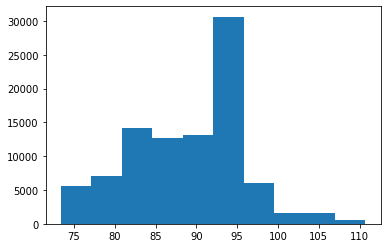

In [36]:
plt.hist(total_train.prop_masculinidad)

In [38]:
vars_geoms = [col for col in total_train.columns if 'GEOM_' in col]

In [42]:
vars_geoms

['GEOM_R1', 'GEOM_R2', 'GEOM_R3', 'GEOM_R4']

In [43]:
total_train['suma_geoms'] = total_train[vars_geoms].sum(axis=1)

In [44]:
total_train['suma_geoms']

0         1.534985
1         2.643100
2         2.689294
3         1.756108
4         1.896988
            ...   
103225    1.779809
103226    0.918602
103227    1.051577
103228    2.034382
103229    1.496424
Name: suma_geoms, Length: 103230, dtype: float64

In [47]:
#sns.pointplot(total_train.suma_geoms, total_train.suma_geoms, hue=total_train.CLASE)

In [57]:
#total_train.groupby(by='CLASE')['suma_geoms'].min()

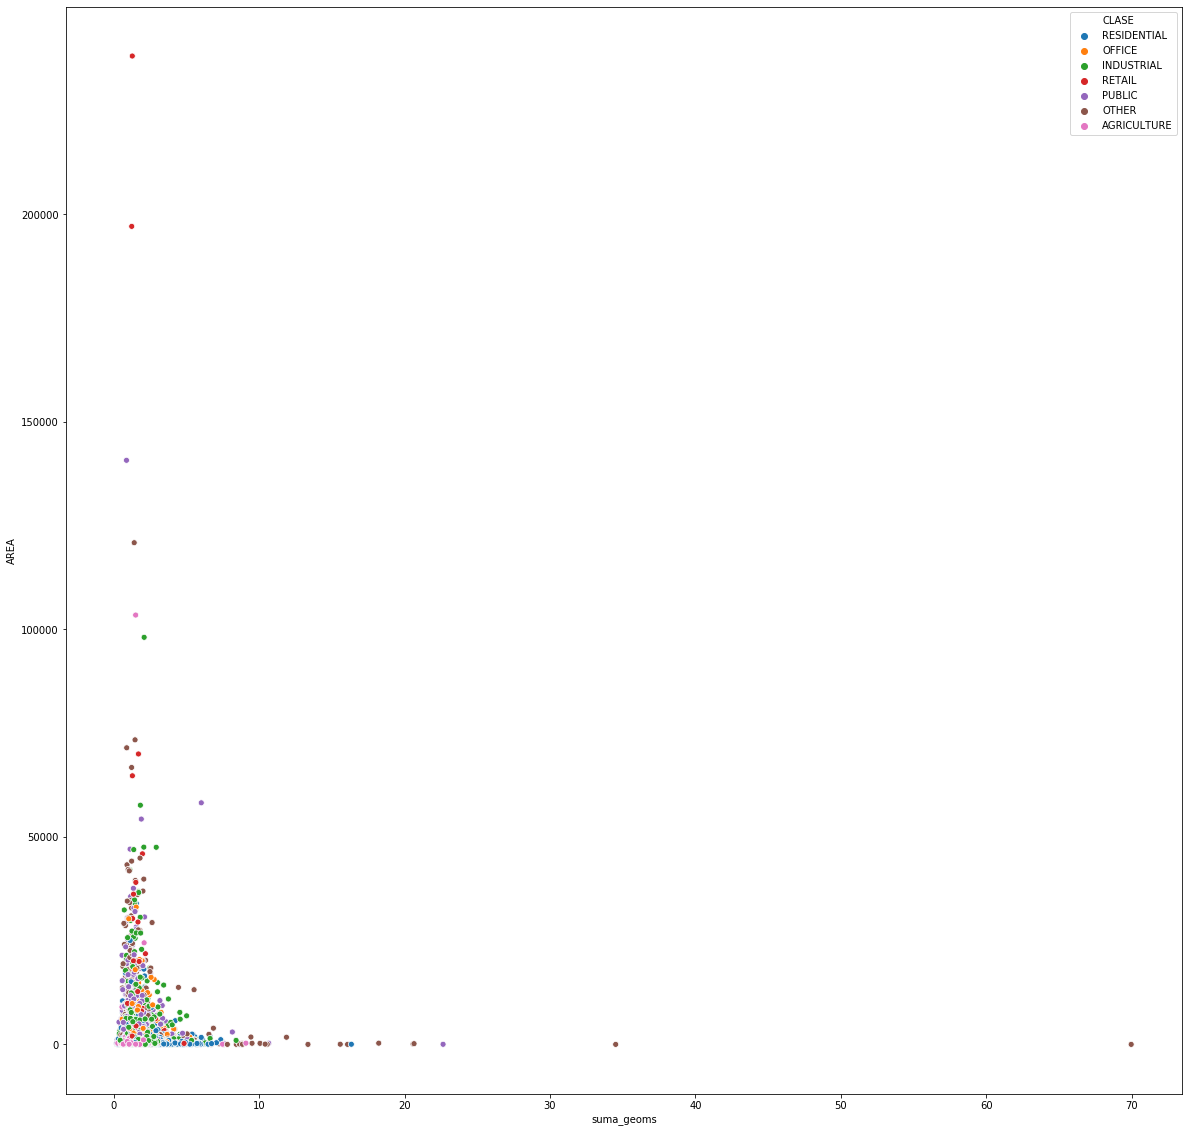

In [59]:
plt.rcParams['figure.figsize'] = (20, 20)
sns.scatterplot(total_train['suma_geoms'], total_train['AREA'], hue=total_train['CLASE'])

In [60]:
# 3 , 13, 14 (rarísimo), 15 (casi normal pero algo asimétrico),
# 23 (casi normal pero algo asimétrico), 24, 25,
# 26 (asimétrica a tope), 27, 28, 30 (muy centrada, aunque así hay más)
# 31 (parecida a 30), 32 (igual q 31, 30), 33 (asimétrica con algunos outliers)
# 34 (parecida a 33), 35 (bastante asimétrica con outliers claros), 
# 36 (solo tiene valores en una franja concreta a excepción de unos pocos outliers)
# 38 (mucha asimetría), 39 (igual), 40 (igual), 41 (igual), 42 (igual), 43 (igual)
# 44 (igual), 45 (igual), 46 (rarísima, échale un ojo tú mismo),  
# 47 (casi todos los valores cerca del 0, algunos valores a tomar x culo)
# 49 (parecida a 47, pero el rango es menor), 50 (igual q 49)
# 51 (igual que 49 y 50 pero algo mayor el rango), 
# 52 (claramente entre los años 50 y 2000 se construyen la mayoría de las casas)
# 53 (me parece claramente categórica, dime tu como lo ves )
# 54 (claramente categórica; las clases B, A y C poco presentes)
# OBJ: 55 (una asimetría brutal la verdad..., pillar x ejemplo la clase agriculture va a ser muy complicado).


In [66]:
total_train.iloc[:, 53]

0         0.0
1         0.0
2         5.0
3         3.0
4         1.0
         ... 
103225    6.0
103226    NaN
103227    NaN
103228    NaN
103229    NaN
Name: MAXBUILDINGFLOOR, Length: 103230, dtype: float64

In [67]:
total_train.columns

Index(['ID', 'X', 'Y', 'Q_R_4_0_0', 'Q_R_4_0_1', 'Q_R_4_0_2', 'Q_R_4_0_3',
       'Q_R_4_0_4', 'Q_R_4_0_5', 'Q_R_4_0_6',
       ...
       'prop_masculinidad', 'prop_reemplazamiento', 'prop_dependientes',
       'prop_analfabetas', 'prop_paro', 'media_R', 'media_G', 'media_B',
       'media_NIR', 'suma_geoms'],
      dtype='object', length=200)

In [3]:
with open('X_train.pkl', 'rb') as f:
    Xtr = pickle.load(f)
    

In [4]:
Xtr

,X,Y,Q_R_4_0_0,Q_R_4_0_1,Q_R_4_0_2,Q_R_4_0_3,Q_R_4_0_4,Q_R_4_0_5,Q_R_4_0_6,Q_R_4_0_7,...,GEO_X,GEO_Y,GEO_Z,x_rot_90,y_rot_90,x_rot_180,y_rot_180,lat_2,lon_2,latxlon
30208,-0.443066,-0.899621,-0.014450,-0.167221,-0.260685,-0.283214,-0.275318,-0.229916,-0.188425,-0.163476,...,-0.244182,1.132187,1.151950,0.899621,-0.443066,0.443066,0.899621,-0.448035,-0.899290,-0.528613
11151,0.244712,0.283651,-0.014450,-0.177276,-0.005411,0.087022,0.116909,0.082734,0.095872,0.097383,...,-1.442539,1.370660,0.072313,-0.283651,0.244712,-0.244712,-0.283651,0.238837,0.282944,0.271341
92568,0.369720,-1.966199,0.490112,0.828048,0.299281,0.181327,0.195109,0.212440,0.198882,0.102213,...,-0.684882,0.942757,1.146777,1.966199,0.369720,-0.369720,1.966199,0.364313,-1.963453,0.173406
53647,0.890088,0.177813,-0.014450,0.053961,0.291053,0.435395,0.520874,0.604718,0.653743,0.657786,...,-0.032354,-1.986915,0.167144,-0.177813,0.890088,-0.890088,-0.177813,0.888721,0.177128,0.902852
41713,-0.875332,-0.453001,-0.014450,-1.112226,-1.092395,-0.823998,-0.547644,-0.312477,-0.166978,-0.115197,...,0.783986,-1.554131,0.700444,0.453001,-0.875332,0.875332,0.453001,-0.876717,-0.453264,-0.914568
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17979,1.682573,0.954457,0.066843,1.994220,2.061516,2.170262,2.319111,2.459695,2.477548,2.459785,...,0.629031,-0.887411,-1.190667,-0.954457,1.682573,-1.682573,-0.954457,1.693840,0.953926,1.769118
41935,-1.225220,-0.590738,-0.014450,-1.534461,-1.401968,-1.168782,-1.075369,-0.984783,-0.880421,-0.781888,...,-1.444056,0.909670,-0.728916,0.590738,-1.225220,1.225220,0.590738,-1.221999,-0.590844,-1.275669
92533,0.663737,-2.145197,0.003500,1.597185,0.933299,0.435440,0.038743,-0.288870,-0.590627,-0.849501,...,0.825276,1.524360,0.707337,2.145197,0.663737,-0.663737,2.145197,0.660198,-2.141909,0.447340
12233,-0.272145,1.004933,-0.014450,-1.524406,-1.397036,-1.190572,-0.964620,-0.796129,-0.665827,-0.549954,...,0.765846,-1.489705,-0.778176,-1.004933,-0.272145,0.272145,-1.004933,-0.277889,1.004437,-0.172143
